## Preface



First, install `CFEDemand` package if necessary:



In [1]:
!pip install CFEDemands --upgrade

  Using cached https://files.pythonhosted.org/packages/4f/7e/bfc981e0831f55dbecc1e71009edd500ca8200a9e618df60b53932c98b95/CFEDemands-0.1.6.6-py2.py3-none-any.whl


## Compensated Policy Experiments



Compare Marshallian (uncompensated) and Hicksian (compensated)
demands:



In [2]:
#income effect, Hicksian=with compensensated, Marshallian = no compensated
from costs_preface import *

#USE_GOOD = 'Rice'
USE_GOOD = 'Rice'

#price level for Rice=blue horizontial line
U0 = r.indirect_utility(x0,p)

plt.plot([r.demands(x0,my_prices(p0,i=USE_GOOD))[USE_GOOD] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=USE_GOOD),type="Hicksian")[USE_GOOD] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(USE_GOOD)
plt.axhline(p.sel(i=USE_GOOD).values)
plt.legend(("Marshallian","Hicksian"))
plt


/srv/app/venv/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/app/venv/lib/python3.6/site-packages/xarray/core/nputils.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


<module 'matplotlib.pyplot' from '/srv/app/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

Define some useful functions for measuring costs:



In [3]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

#func: revenue: type1:marshallian with no compensated
def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    return dp.T@r.demands(U0,p1,type=type)


#func:dwl: rev minus the compensated revenue which equals to the NetRevenue
def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return revenue(U0,p0,p1,type='Hicksian') - cv
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

#function of compensated_nutrient-adequacy_ratio: increase the price of a good, how much should you compenstaed to the hh to reach the same level of utility 
def compensated_nutrient_adequacy_ratio(U,p):
    return compensated_nutrient_demand(U,p)/hh_rda

Text(0.5, 0, 'Price of Rice')

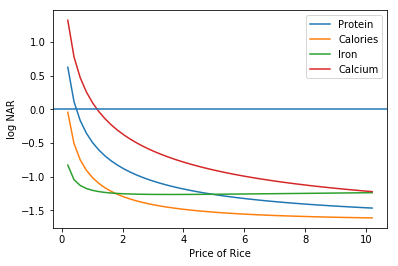

In [4]:
#the figure shows hoe changing price affect price, hh nutritions' level
fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % USE_GOOD)

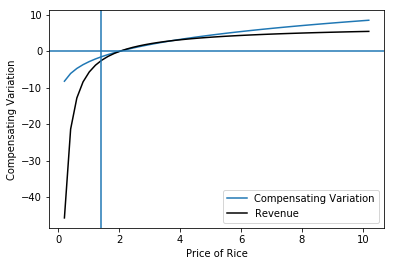

In [10]:
#shows the conpensating variations with the revenue,
#in this case, if we lower the price, so we take some money back from hh, revenue goes down to negative,
    #the black and blue curves close to each other, 
    #So we can raise price of milk to 5 and still price effectiveness as these two lines are still alline
#in other case, if we impose a tax, 
     #which means increases the price, we should compensate to hh, revenue to goes up to potitive
#more: we can compare more than one food's price change to see how the results
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,p,my_prices(p0)) for p0 in P])
ax1.set_xlabel("Price of %s" % USE_GOOD)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,p,my_prices(p0)) for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(p.loc[USE_GOOD])


In [19]:
#Reguar food - list all
df = pd.read_pickle('./IndianICRISAT/fct.df')
df.to_csv('my_file.csv')
df

,,Protein,Fat,fibre,carbohydrate,Calories,energy_kj,Calcium,Iron,Betacarotene,caroten_total,Thiamine,Riboflavin,Niacin,Ascorbic Acid,ext_source,pu_cal,pu_prot,pu_fat
Item name,unit,,,,,,,,,,,,,,,,,,
Paddy (Local variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Paddy (HYV),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Rice (local variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Rice (HYV variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Wheat (Local variety),Kilograms,105.800003,15.000000,112.949997,644.449951,3.208895e+03,1.343500e+04,3.515000e+02,40.349998,28.500000,2840.000000,4.400000,1.500000,25.250000,0.000000,0.0,3410.000000,121.0,17.000000
Wheat (HYV),Kilograms,105.800003,15.000000,112.949997,644.449951,3.208895e+03,1.343500e+04,3.515000e+02,40.349998,28.500000,2840.000000,4.400000,1.500000,25.250000,0.000000,0.0,3410.000000,121.0,17.000000
Jowar/Sorghum (Local variety),Kilograms,99.700005,17.299999,102.200005,676.799988,3.339065e+03,1.398000e+04,2.760000e+02,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Jowar/Sorghum (HYV),Kilograms,99.700005,17.299999,102.200005,676.799988,3.339065e+03,1.398000e+04,2.760000e+02,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Bajra/Pearl millet (Local variety),Kilograms,102.699997,51.399998,70.699997,580.266663,2.987166e+03,1.250667e+04,2.589333e+02,60.766663,267.266663,2440.633301,2.366667,1.900000,8.133333,0.000000,0.0,3032.000000,97.0,42.000000


In [20]:
#Golden rice 
df_golden = pd.read_pickle('./IndianICRISAT/fct.df')
df.to_csv('my_golden_file.csv')
df_golden

,,Protein,Fat,fibre,carbohydrate,Calories,energy_kj,Calcium,Iron,Betacarotene,caroten_total,Thiamine,Riboflavin,Niacin,Ascorbic Acid,ext_source,pu_cal,pu_prot,pu_fat
Item name,unit,,,,,,,,,,,,,,,,,,
Paddy (Local variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Paddy (HYV),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Rice (local variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Rice (HYV variety),Kilograms,78.099998,5.500000,37.400002,771.600037,3.513423e+03,1.471000e+04,8.110000e+01,7.200000,0.000000,469.000000,1.700000,0.600000,25.100000,0.000000,0.0,3460.000000,75.0,5.000000
Wheat (Local variety),Kilograms,105.800003,15.000000,112.949997,644.449951,3.208895e+03,1.343500e+04,3.515000e+02,40.349998,28.500000,2840.000000,4.400000,1.500000,25.250000,0.000000,0.0,3410.000000,121.0,17.000000
Wheat (HYV),Kilograms,105.800003,15.000000,112.949997,644.449951,3.208895e+03,1.343500e+04,3.515000e+02,40.349998,28.500000,2840.000000,4.400000,1.500000,25.250000,0.000000,0.0,3410.000000,121.0,17.000000
Jowar/Sorghum (Local variety),Kilograms,99.700005,17.299999,102.200005,676.799988,3.339065e+03,1.398000e+04,2.760000e+02,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Jowar/Sorghum (HYV),Kilograms,99.700005,17.299999,102.200005,676.799988,3.339065e+03,1.398000e+04,2.760000e+02,39.500000,82.900002,2120.000000,3.500000,1.400000,21.000000,0.000000,0.0,3490.000000,104.0,19.000000
Bajra/Pearl millet (Local variety),Kilograms,102.699997,51.399998,70.699997,580.266663,2.987166e+03,1.250667e+04,2.589333e+02,60.766663,267.266663,2440.633301,2.366667,1.900000,8.133333,0.000000,0.0,3032.000000,97.0,42.000000


In [8]:
p.to_dataframe()


,t,m,prices
i,,,
Bengalgram dhal,75,A,6.855503
Ceremonial expenses,75,A,1.000000
Chillies,75,A,2.339487
Clothing,75,A,1.000000
Coconut,75,A,1.140172
Complete meals in hotel,75,A,1.000000
Cosmetics tooth paste etc.,75,A,1.000000
Edible oils,75,A,8.899037
"Educational material expenses (pen, books, paper, etc.)",75,A,1.000000


NameError: name 'axl' is not defined

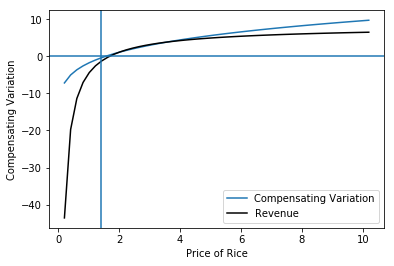

In [13]:
#Having a rebate = change price to my_p
p.to_dataframe()
my_p = p.copy()

#tax sugar = 1, 
my_p.loc['Sugar']= 4.276

#tax Tobacco = 1
my_p.loc['Tobacco, beedi'] = 2
#my_p.loc['Bengalgram dhal']=3
my_p

fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,p,my_prices(p0,p=my_p)) for p0 in P])
ax1.set_xlabel("Price of %s" % USE_GOOD)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,p,my_prices(p0,p=my_p)) for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(p.loc[USE_GOOD])
axl